In [72]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs
import numpy as np
import scipy.io
import glob
import netCDF4 as nc

% matplotlib inline

In [52]:
from mpl_toolkits.basemap import Basemap, cm, addcyclic

In [7]:
def sample_data(shape=(20, 30)):
    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v

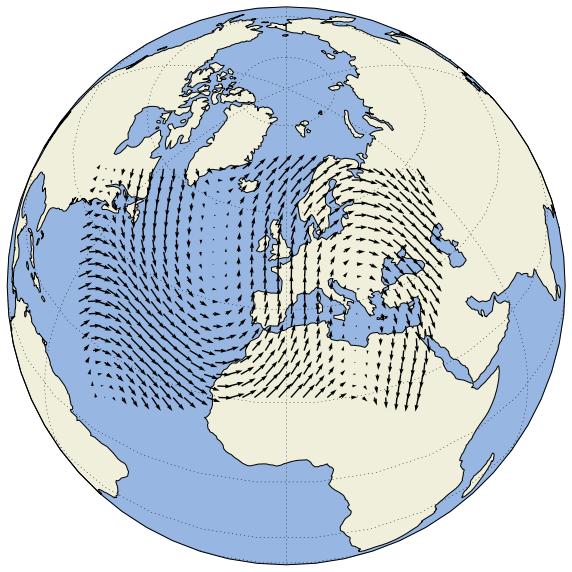

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection=ccrs.Orthographic(0, 45))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

x, y, u, v = sample_data()
vector_crs = ccrs.RotatedPole(pole_longitude=180, pole_latitude=45)
ax.quiver(x, y, u, v, transform=vector_crs)

plt.show()

In [14]:
lon, lat = np.meshgrid(np.linspace(-180, 180, 180), np.linspace(20, 90, 70))
u = 10 * (2 * np.cos(2 * np.deg2rad(lon) + 3 * np.deg2rad(lat + 30)) ** 2)
v = 20 * np.cos(6 * np.deg2rad(lon))

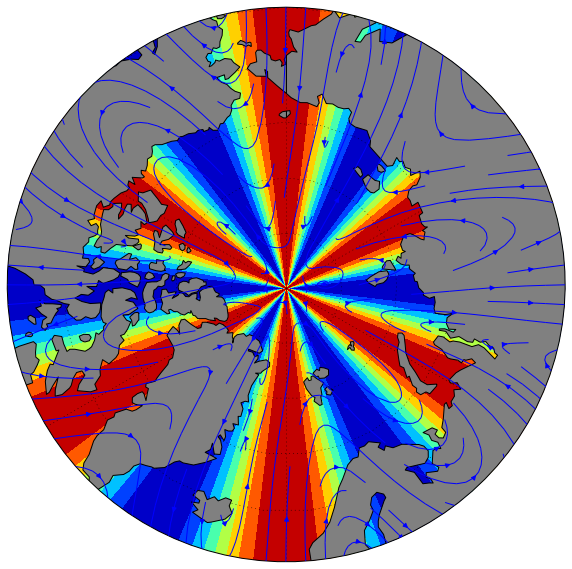

In [89]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection=ccrs.NorthPolarStereo(0))

#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black', facecolor='0.5')

ax.set_global()
ax.gridlines()

ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

crs = ccrs.RotatedPole(pole_longitude=180, pole_latitude=90)
ax.contourf(lon, lat, v, transform=crs, zorder=1)
ax.streamplot(lon, lat, u, v, transform=crs, zorder=3)#, regrid_shape=50)

plt.show()

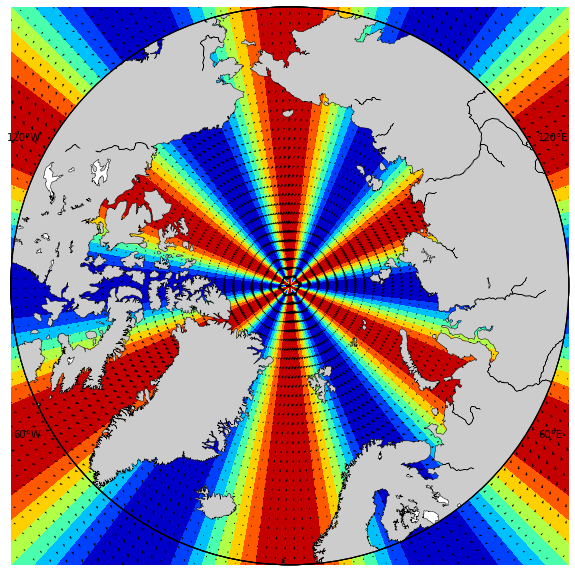

In [65]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.array([60, 120, 240, 300]), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=0.5, color='k')
uproj, vproj, x, y = proj.rotate_vector(u, v, lon, lat, returnxy=True)
ax.contourf(x, y, v)
ax.quiver(x, y, uproj, vproj)

In [73]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]
e3t = coordinate_obj.variables['e3t_0'][:]

In [74]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current.mat')
vozocrtx0 = MAT['vozocrtx0'][:]
vomecrty0 = MAT['vomecrty0'][:]
u_mean = vozocrtx0[1, :, :]
v_mean = vomecrty0[1, :, :]

In [119]:
v_mean = np.ma.masked_where(np.isnan(v_mean), v_mean)

In [117]:
n = 4

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection=ccrs.NorthPolarStereo(0))

#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', facecolor='0.5')
ax.coastlines(resolution='10m')
ax.set_global()
ax.gridlines()

ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

crs = ccrs.RotatedPole(pole_longitude=180, pole_latitude=90)
ax.pcolor(nav_lon, nav_lat, v_mean, transform=crs, zorder=1)
#ax.quiver(nav_lon[::n, ::n], nav_lat[::n, ::n], u_mean[::n, ::n], v_mean[::n, ::n], transform=crs, zorder=3, regrid_shape=100, scale=2.5)

plt.show()

/home/yingkai/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


KeyboardInterrupt: 

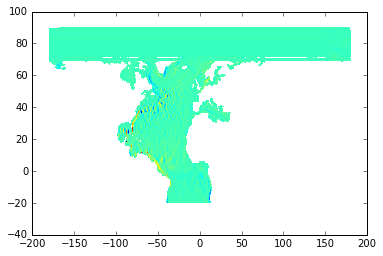

In [120]:
plt.pcolormesh(nav_lon, nav_lat, v_mean)